# _**KNN algorithm 02/04/2025**_

# Installing dependencies

In [1]:
! pip install seaborn

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# from google.colab import drive #for forceful mount

# Reading data [csv]

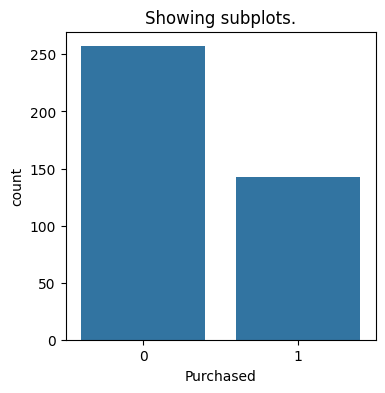

In [3]:
# drive.mount('/content/drive') #for forceful mount
# ax=sns.countplot(x=dfr['Purchased'])
# ax=plt.subplots(figsize=(4,4))
dfr = pd.read_csv('./xl/Social_Network_Ads.csv')
fig,ax=plt.subplots(figsize=(4,4))
ax.set_title('Showing subplots.')
sns.countplot(x=dfr['Purchased'],ax=ax)
plt.show()

# Feature extraction

In [5]:
x=dfr.iloc[:,[1,2,3]].values # gender,age,salary
y=dfr.iloc[:,4].values #purchased
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])  # gender classification
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# print(x_train[:,0])

# Feature scaling

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create a KNN classifier with a specified value of K

In [7]:
kv = 5
knn_classifier = KNeighborsClassifier(n_neighbors=kv)

# Fit the model to the training data

In [8]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

# Make predictions on the test data

In [9]:
y_pred = knn_classifier.predict(x_test)

# Evaluate performance of classifier

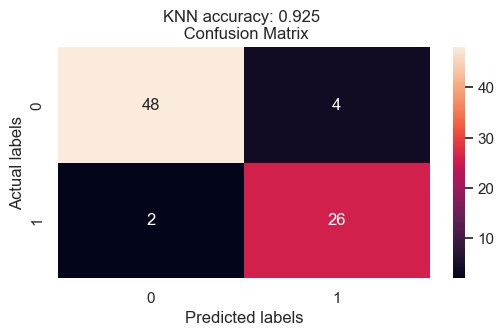

report :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



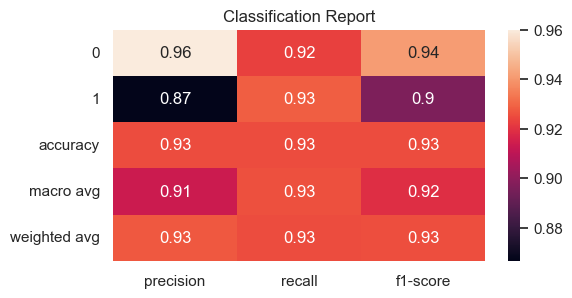

In [10]:
accuracy = accuracy_score(y_test,y_pred)
cmat = confusion_matrix(y_test,y_pred)
crep = classification_report(y_test,y_pred)
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(cmat,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title(f'KNN accuracy: {accuracy} \n Confusion Matrix')
plt.show()
print(f"report :\n {crep}")
crep_dict = classification_report(y_test,y_pred,output_dict=True)
sns.heatmap(pd.DataFrame(crep_dict).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()

# Predict wheather a targeted audience will purchase a product or not

In [11]:
new_data = np.array([[0, 30, 50000]])
prediction = knn_classifier.predict(scaler.transform (new_data))
if prediction[0] == 1:
    print("The targeted audience is likely to purchase the product.")
else:
    print("The targeted audience is unlikely to purchase the product.")

The targeted audience is unlikely to purchase the product.


# ***More on KNN 09/04/2025***

# Evaluation metrices

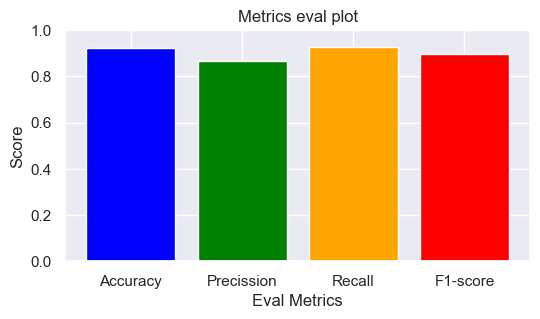

In [12]:
metrics_names = ['Accuracy','Precission','Recall','F1-score']
precision = crep_dict['1']['precision']
recall = crep_dict['1']['recall']
f1 = crep_dict['1']['f1-score']
metrics_values = [accuracy,precision,recall,f1]
plt.bar(metrics_names,metrics_values,color = ['blue','green','orange','red'])
plt.ylim([0,1])
plt.xlabel('Eval Metrics')
plt.ylabel('Score')
plt.title('Metrics eval plot')
plt.show()

# Train for cross validation

In [14]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import make_scorer
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scoring = make_scorer(accuracy_score)
cv_results = cross_val_score(knn_classifier,x,y,cv=cv,scoring=scoring)
print(f'Cross validation results: {cv_results} \navg accuracy: {np.mean(cv_results)}')

Cross validation results: [0.675 0.8   0.775 0.9   0.8   0.75  0.925 0.85  0.75  0.8  ] 
avg accuracy: 0.8025


# TFCV accuracy

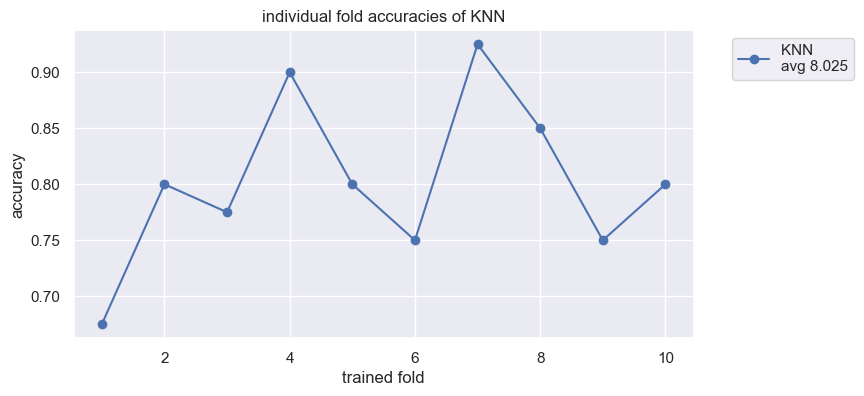

In [15]:
models = ['KNN']
accuracies = {models[0]:cv_results}
for model in models:
  plt.figure(figsize=(8,4))
  plt.plot(range(1,11),accuracies[model],marker='o',label=f'{model} \navg {sum(accuracies[model])}')
  plt.title('individual fold accuracies of KNN')
  plt.xlabel('trained fold')
  plt.ylabel('accuracy')
  plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
  plt.show()
